<h1 align="center">Simple Linear Regression</h1>

![Image of City of Toronto](http://propertiesunlimited.ca/_media/Images/toronto-banner-1.jpg)

The dataset is obtained from <a href="https://www.toronto.ca/city-government/data-research-maps/toronto-progress-portal/">Toronto Progress Portal</a>.

# <font color=Red>1. Preparation</font>

## <font color=Blue>1.1. Importing Modules</font>

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

# <font color=Red>2. Exploring and Cleaning</font>

## <font color=Blue>2.1. Loading</font>

I will be loading the csv data with Pandas

In [24]:
df=pd.read_csv("TorontoMeasureData.csv")

In [162]:
print("Previewing the first 5 and last 5 rows of the data by concatenating the head and the tail.")
pd.concat([df.head(), df.tail()])

Previewing the first 5 and last 5 rows of the data by concatenating the head and the tail.


,Measure Name,Year,Period,Value
0,Number of Personal Bankruptcies (Ontario),2007,Jan,2307.0
1,Number of Personal Bankruptcies (Ontario),2007,Feb,2369.0
2,Number of Personal Bankruptcies (Ontario),2007,Mar,2715.0
3,Number of Personal Bankruptcies (Ontario),2007,Apr,2651.0
4,Number of Personal Bankruptcies (Ontario),2007,May,2931.0
6296,Libraries Circulation of Materials,2016,Q3,8120345.0
6297,Libraries Circulation of Materials,2016,Q4,7588610.0
6298,Libraries Circulation of Materials,2017,Q1,7531041.0
6299,Libraries Circulation of Materials,2017,Q2,7420675.0
6300,Libraries Circulation of Materials,2017,Q3,7858823.0


Let us look at the individual columns.

In [45]:
for column in df.columns:
    print(column+":", len(df[column].unique()), "unique values")

Measure Name: 69 unique values
Year: 16 unique values
Period: 22 unique values
Value: 5247 unique values


In [58]:
print("The Year column has {} unique values which ranges from {} to {}".format(len(df["Year"].unique()), 
                                                                        df["Year"].unique().min(), 
                                                                        df["Year"].unique().max()))

The Year column has 16 unique values which ranges from 2003 to 2018


In [59]:
print(df["Period"].unique())

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec'
 'Q1' 'Q2' 'Q3' 'Q4' 'Q12' nan 'Winter' 'Spring' 'Summer' 'Fall']


The period column values vary from the months of January to December, the 4 quarters, as well as the 4 seasons.

Let us take a look at all the measures.

In [140]:
for item in df["Measure Name"].unique():
    print(item)

Number of Personal Bankruptcies (Ontario)
Percentage of Ontario Residential Mortgages (in Arrears 3 months or more)
Food Bank Usage 
Size of Waiting List for Social Housing (Total Number) 
Number of Rent Bank Loans Granted 
Shelter Use Singles (Average Individual Per Night) 
Shelter Use Families (Average Individuals Per Night) 
Child Care Number of Children on Wait list for a Child Care Fee Subsidy
Crime Total Number of Incidents (in 7 Crime Categories)
Crime Number of Murders 
Crime Number of Sexual Assaults 
Crime Number of Assaults 
Crime Number of Robberies 
Crime Number of Break and Enters 
Crime Number of Auto Thefts 
Crime Number of Thefts Over $5000 
Community Planning Number of Applications 
Committee of Adjustment Number of Applications 
Construction Value of Building Permits Issued (All Types)
Construction Value of Building Applications Received (All Types)
Construction Value of Building Permits Issued (Residential)
Construction Value of Building Applications Received (Resid

# <font color=Red>3. Two Examples of Linear Regression</font>

## <font color=Blue>3.1. Crimes vs Unemployment Rate</font>

In [155]:
# Slicing the dataframe for crime, renaming the long column name to a shorter one
crime=df[df["Measure Name"] == "Crime Total Number of Incidents (in 7 Crime Categories)"][["Year", "Period", "Value"]]
crime.rename(columns = {'Value':'crimes'}, inplace = True)
# Adds a shorter "time" variable to merge on
crime["Time"] = crime["Year"].apply(str) + crime["Period"]
crime=crime.drop(["Year", "Period"], axis=1)

# Slicing the dataframe for unemployment rate, renaming the long column name to a shorter one
unemp=df[df["Measure Name"] == "Unemployment Rate (Toronto Residents)"][["Year", "Period", "Value"]]
unemp.rename(columns = {'Value':'unemprates'}, inplace = True)
# Adds a shorter "time" variable to merge on
unemp["Time"] = unemp["Year"].apply(str) + unemp["Period"]
unemp=unemp.drop(["Year", "Period"], axis=1)

In [156]:
# Merges the two dataframe on the "time" variable
df1=pd.merge(crime, unemp, how="inner", on="Time")

R squared:       0.0403077780476


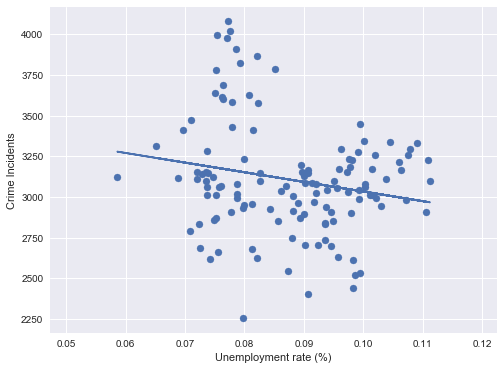

In [161]:
# Plots the scatter plot
x1=df1["unemprates"]
y1=df1["crimes"]
plt.figure(figsize=(8,6))
plt.scatter(x1,y1)
plt.xlabel("Unemployment rate (%)")
plt.ylabel("Crime Incidents")

# Fits a linear regression model
model1=LinearRegression(fit_intercept=True)
model1.fit(x1[:, np.newaxis],y1)

# Predicts and plots the line fit
x1fit=np.linspace(df1["unemprates"].min(),df1["unemprates"].max(),10000)
y1fit=model1.predict(x1[:, np.newaxis])
plt.plot(x1, y1fit)
print("R squared:      ", r2_score(y1, y1fit))

My hypothesis was that there would be <u><b>weak to moderate positive correlation</b></u> for the data since higher unemployment rate would force people to do unlawful things. Apparently it is not so in Toronto, there seems to be <u><b>no correlation</b></u> at all. Obviously this is not a perfect model, in fact, it is a very simple one. When I revisit this dataset at a future date, I will factor in Time-series and check out Ridge Regression and Lasso but for now, I am keeping the notebook to a very minimum.

## <font color=Blue>3.2. Crimes vs Business Bankruptcies</font>

In [150]:
# Slicing the dataframe for crime, renaming the long column name to a shorter one
crime=df[df["Measure Name"] == "Crime Total Number of Incidents (in 7 Crime Categories)"][["Year", "Period", "Value"]]
crime.rename(columns = {'Value':'crimes'}, inplace = True)
# Adds a shorter "time" variable to merge on
crime["Time"] = crime["Year"].apply(str) + crime["Period"]
crime=crime.drop(["Year", "Period"], axis=1)

# Slicing the dataframe for unemployment rate, renaming the long column name to a shorter one
bnkrpt=df[df["Measure Name"] == "Number of Business Bankruptcies (Ontario) "][["Year", "Period", "Value"]]
bnkrpt.rename(columns = {'Value':'bsnsbnkrpt'}, inplace = True)
# Adds a shorter "time" variable to merge on
bnkrpt["Time"] = bnkrpt["Year"].apply(str) + bnkrpt["Period"]
bnkrpt=bnkrpt.drop(["Year", "Period"], axis=1)

In [151]:
# Merges the two dataframe on the "time" variable
df2=pd.merge(crime, bnkrpt, how="inner", on="Time")

R squared:       0.484124883263
Model slope:     4.03980426687
Model intercept: 2629.09569423


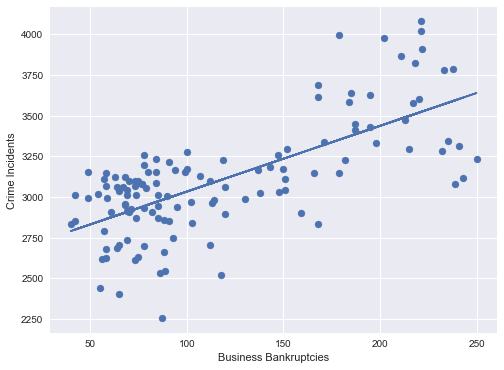

In [160]:
# Plots the scatter plot
x2=df2["bsnsbnkrpt"]
y2=df2["crimes"]
plt.figure(figsize=(8,6))
plt.scatter(x2,y2)
plt.xlabel("Business Bankruptcies")
plt.ylabel("Crime Incidents")

# Fits a linear regression model
model2=LinearRegression(fit_intercept=True)
model2.fit(x2[:, np.newaxis],y2)

# Predicts and plots the line fit
x2fit=np.linspace(df2["bsnsbnkrpt"].min(),df2["bsnsbnkrpt"].max(),10000)
y2fit=model2.predict(x2[:, np.newaxis])
plt.plot(x2, y2fit)
print("R squared:      ", r2_score(y2, y2fit))
print("Model slope:    ", model2.coef_[0])
print("Model intercept:", model2.intercept_)

As I saw the measure of "Business Bankruptcies", I thought that it would have a moderate positive correlation with both unemployment rates and crime incidents. I tested the model of business bankruptcies as independent variable and the crime incidents as the dependent variable. The model with R-squared value of 0.48 and slope of approximately 4 seems to point to moderate positive correlation.

I am very curious as to how the measures relate to one another: correlation & multicollinearity. Unfortunately I am on a time constraint at the moment, if you have any suggestions, let me know via email!